In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorwatch as tw
import time

In [3]:
#%matplotlib notebook
#import tensorwatch as tw
#import time
#
## streams will be stored in test.log file
#client = tw.WatcherClient()

# create a stream for logging
#stream = client.create_stream(expr='lambda d: (d.frames, d.episode_score)')

#line_plot = tw.Visualizer(stream, vis_type='line', xtitle="Frames", ytitle="Reward", yrange=(-21,21))
#line_plot.show()

In [4]:
avg_stream = client.create_stream(expr='lambda d:(d.frames, d.total_score/d.episode)')
avg_plot = tw.Visualizer(avg_stream, vis_type='line', host=line_plot, xtitle='Frames', ytitle='Average Reward', yrange=(-21,21))
avg_plot.show()

NameError: name 'client' is not defined

In [5]:
from models import Qnet
q = Qnet(84,84,4,8)
tw.model_stats(q,[32,4,84,84])

,module name,input shape,output shape,params,memory(MB),MAdd,Flops,MemRead(B),MemWrite(B),duration[%],MemR+W(B)
0,conv1,4 84 84,32 20 20,8224.0,0.05,"6,553,600.0","3,289,600.0",145792.0,51200.0,27.26%,196992.0
1,bn1,32 20 20,32 20 20,64.0,0.05,"51,200.0","25,600.0",51456.0,51200.0,4.23%,102656.0
2,conv2,32 20 20,64 9 9,32832.0,0.02,"5,308,416.0","2,659,392.0",182528.0,20736.0,21.80%,203264.0
3,bn2,64 9 9,64 9 9,128.0,0.02,"20,736.0","10,368.0",21248.0,20736.0,1.78%,41984.0
4,conv3,64 9 9,64 7 7,36928.0,0.01,"3,612,672.0","1,809,472.0",168448.0,12544.0,20.96%,180992.0
5,bn3,64 7 7,64 7 7,128.0,0.01,"12,544.0","6,272.0",13056.0,12544.0,1.61%,25600.0
6,head.0,3136,512,1606144.0,0.00,"3,210,752.0","1,605,632.0",6437120.0,2048.0,19.25%,6439168.0
7,head.1,512,512,0.0,0.00,512.0,512.0,2048.0,2048.0,1.11%,4096.0
8,head.2,512,8,4104.0,0.00,"8,184.0","4,096.0",18464.0,32.0,2.00%,18496.0
total,,,,1688552.0,0.17,"18,778,616.0","9,410,944.0",18464.0,32.0,100.00%,7213248.0


In [7]:
import pandas as pd
from matplotlib import pyplot as plt

def convert_line_to_dict(line):
    out_dict = {}
    lines = [l.strip() for l in line.strip().split(',')]
    for kv in lines:
        k,v = kv.split(':')
        k=k.strip()
        v=v.strip()
        out_dict[k] = float(v.replace('%',''))
    return out_dict

def load_stats_from_logging(logging_file):
    with open(logging_file,'r') as f:
        lines = f.readlines()
    dicts = [convert_line_to_dict(line) for line in lines[21:]]
    return pd.DataFrame(dicts)


def load_multiple_models(model_log_files):
    return [load_stats_from_logging(log_file) for log_file in model_log_files]

In [8]:
def plot_x_vs_y(x, y, xlab, ylab, models, legend, episode_start = 0, episode_end = None):
    plt.figure(figsize=(20,10))
    
    for m in models:
        plt.plot(m.iloc[episode_start:episode_end][x], m.iloc[episode_start:episode_end][y])
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title("Atari Pong")
    plt.legend(legend)
    plt.show()
def plot_episode_vs_reward(models, model_legend, episode_start = 0, episode_end=None):
    plot_x_vs_y('n_episode', 'Episode Score', 'Episode', 'Reward', models, model_legend, episode_start, episode_end)
    
def plot_episode_vs_reward_rolling(models, model_legend, episode_start = 0, episode_end=None, k=1):
    models = [m.rolling(k).mean() for m in models]
    plot_episode_vs_reward(models, model_legend, episode_start, episode_end)

def plot_frames_vs_reward(models, model_legend, episode_start = 0, episode_end=None):
    plot_x_vs_y('Total Frames', 'Episode Score', 'Frames', 'Reward', models, model_legend, episode_start, episode_end)
    
def plot_frames_vs_reward_rolling(models, model_legend, episode_start = 0, episode_end=None, k=1):
    models = [m.rolling(k).mean() for m in models]
    plot_frames_vs_reward(models, model_legend, episode_start, episode_end)

In [9]:
BASE_DIR = 'checkpoints/CrazyClimber-v0/'

/home/brandon/anaconda3/envs/gym/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


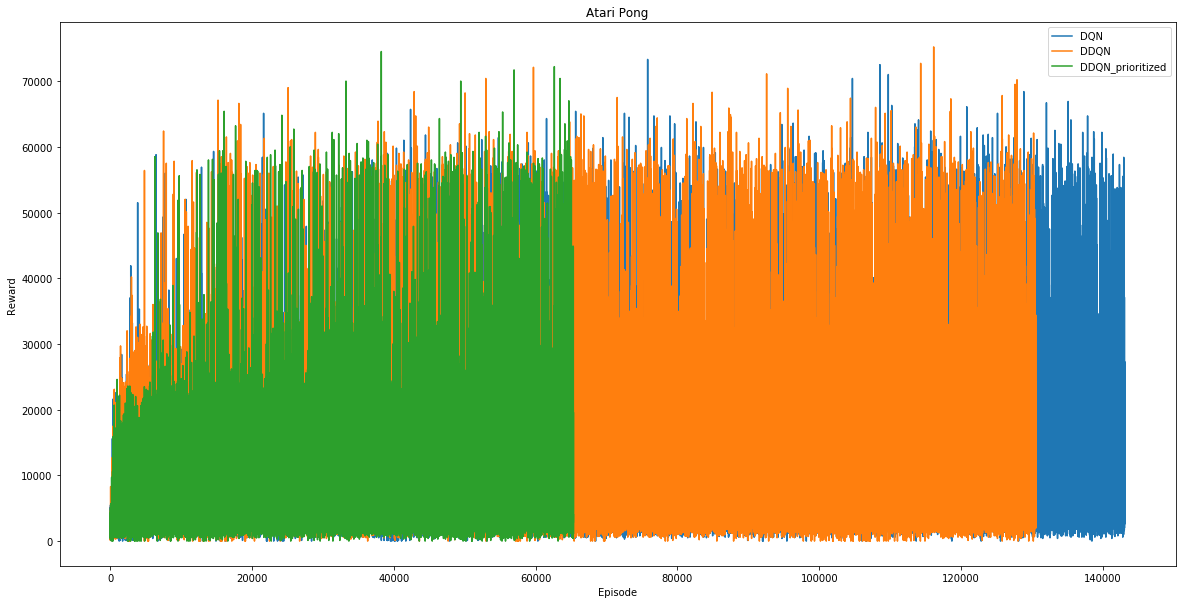

In [10]:
legend = ['DQN','DDQN', 'DDQN_prioritized']
models = [BASE_DIR + l + '/log.out' for l in legend]
dfs = load_multiple_models(models)
plot_episode_vs_reward(dfs, legend, 1)

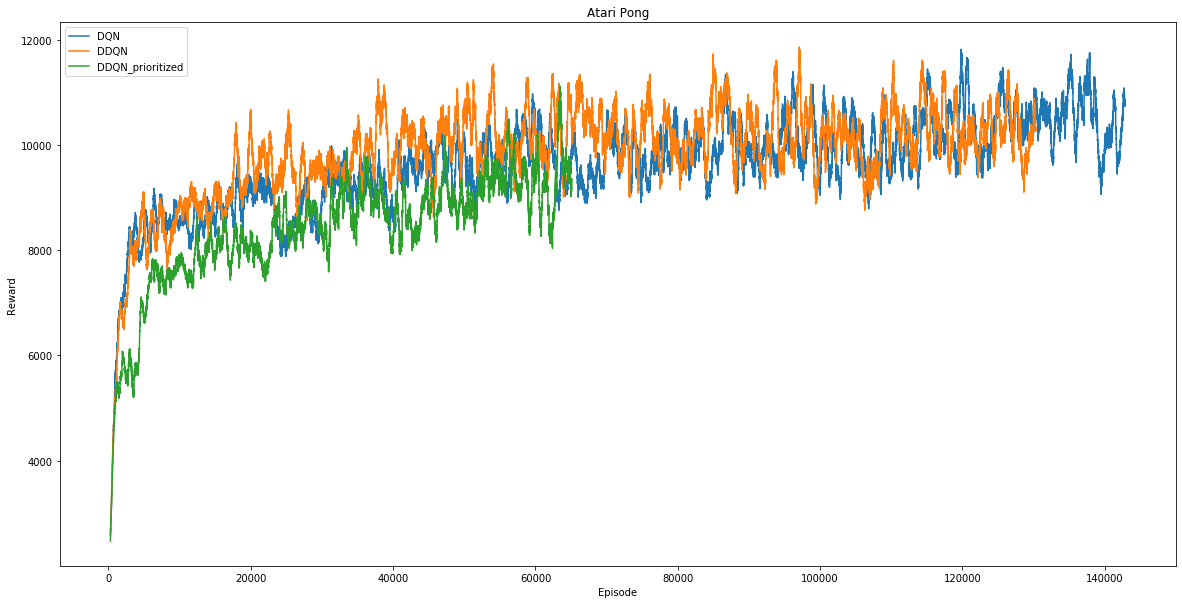

In [11]:
plot_episode_vs_reward_rolling(dfs, legend, 1, None, 500)

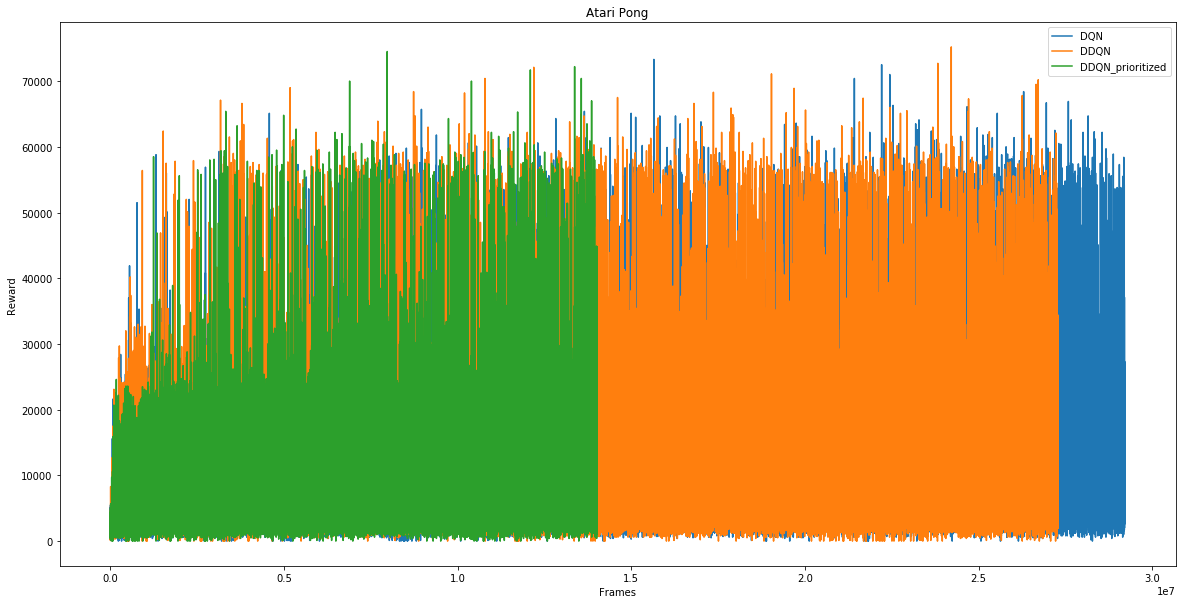

In [12]:
plot_frames_vs_reward(dfs, legend, 0, None)

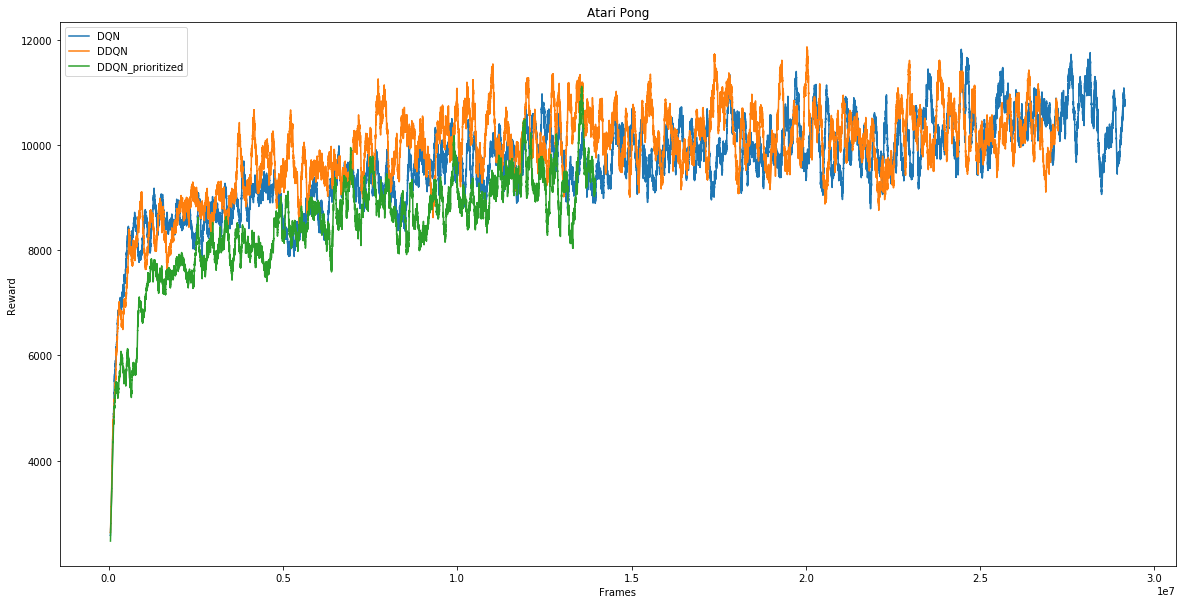

In [13]:
plot_frames_vs_reward_rolling(dfs, legend, 0, None, 500)

In [14]:
from SumTree import SumTree

In [36]:
tree = SumTree(0.1, 20)

In [3]:
for i in range(5):
    tree.addNew(i)

In [1]:
from models import DuelingQnet

In [3]:
net = DuelingQnet(84,84,4,4)

In [2]:
import torch
x = torch.rand((5,4,84,84))
print(x.shape)
x = net.convolutions(x)
print(x.shape)
x = x.view(x.size(0), -1)
print(x.shape)
V = net.value(x)
A = net.advantage(x)
print(V)
print(A)

torch.Size([5, 4, 84, 84])


NameError: name 'net' is not defined

In [30]:
Q = V + A - A.mean(dim=1)[:, None]
print(Q)
print(Q.shape)

tensor([[ 0.0301,  0.1507, -0.2662, -0.0785],
        [ 0.1257,  0.2607, -0.1660,  0.0012],
        [ 0.0823,  0.1603,  0.0234,  0.0927],
        [-0.0428,  0.0514, -0.2748, -0.2555],
        [ 0.0259, -0.0317, -0.2172, -0.0363]], grad_fn=<SubBackward0>)
torch.Size([5, 4])


In [3]:
from DuelingDDQN import DuelingDDQN
import gym
from wrappers import make_env

In [9]:
env = make_env(gym.make('PongNoFrameskip-v4'))
DDDQN = DuelingDDQN(env, 'checkpoints/PongNoFrameskip-v4/DuelingDDQN', 1)

In [10]:
DDDQN.run(100)

  1%|          | 1/100 [00:11<18:13, 11.05s/it]

n_episode : 1, Total Frames : 933, Average Score : -19.0, Episode Score : -19.0, Best Score : -19.0, n_buffer : 933, eps : 100.0%


  2%|▏         | 2/100 [00:20<17:15, 10.57s/it]

n_episode : 2, Total Frames : 1748, Average Score : -20.0, Episode Score : -21.0, Best Score : -19.0, n_buffer : 1748, eps : 99.1%


  3%|▎         | 3/100 [00:31<17:03, 10.55s/it]

n_episode : 3, Total Frames : 2657, Average Score : -20.3, Episode Score : -21.0, Best Score : -19.0, n_buffer : 2657, eps : 98.3%


  4%|▍         | 4/100 [00:41<16:45, 10.47s/it]

n_episode : 4, Total Frames : 3537, Average Score : -20.5, Episode Score : -21.0, Best Score : -19.0, n_buffer : 3537, eps : 97.4%


  5%|▌         | 5/100 [00:50<16:04, 10.15s/it]

n_episode : 5, Total Frames : 4359, Average Score : -20.6, Episode Score : -21.0, Best Score : -19.0, n_buffer : 4359, eps : 96.6%


  6%|▌         | 6/100 [01:00<15:39,  9.99s/it]

n_episode : 6, Total Frames : 5196, Average Score : -20.7, Episode Score : -21.0, Best Score : -19.0, n_buffer : 5196, eps : 95.8%


  7%|▋         | 7/100 [01:09<15:10,  9.79s/it]

n_episode : 7, Total Frames : 6008, Average Score : -20.7, Episode Score : -21.0, Best Score : -19.0, n_buffer : 6008, eps : 95.0%


  8%|▊         | 8/100 [01:22<16:17, 10.62s/it]

n_episode : 8, Total Frames : 7093, Average Score : -20.5, Episode Score : -19.0, Best Score : -19.0, n_buffer : 7093, eps : 94.2%


  9%|▉         | 9/100 [01:33<16:34, 10.93s/it]

n_episode : 9, Total Frames : 8089, Average Score : -20.6, Episode Score : -21.0, Best Score : -19.0, n_buffer : 8089, eps : 93.2%


 10%|█         | 10/100 [01:44<16:16, 10.85s/it]

n_episode : 10, Total Frames : 8998, Average Score : -20.6, Episode Score : -21.0, Best Score : -19.0, n_buffer : 8998, eps : 92.3%


 11%|█         | 11/100 [01:59<17:48, 12.01s/it]

n_episode : 11, Total Frames : 10104, Average Score : -20.5, Episode Score : -19.0, Best Score : -19.0, n_buffer : 10104, eps : 91.5%


 12%|█▏        | 12/100 [02:32<26:57, 18.38s/it]

n_episode : 12, Total Frames : 11185, Average Score : -20.3, Episode Score : -19.0, Best Score : -19.0, n_buffer : 11185, eps : 90.5%


 13%|█▎        | 13/100 [02:59<30:28, 21.02s/it]

n_episode : 13, Total Frames : 12051, Average Score : -20.3, Episode Score : -20.0, Best Score : -19.0, n_buffer : 12051, eps : 89.5%


 14%|█▍        | 14/100 [03:32<35:08, 24.52s/it]

n_episode : 14, Total Frames : 13125, Average Score : -20.2, Episode Score : -19.0, Best Score : -19.0, n_buffer : 13125, eps : 88.8%


 15%|█▌        | 15/100 [03:59<35:53, 25.33s/it]

n_episode : 15, Total Frames : 14003, Average Score : -20.3, Episode Score : -21.0, Best Score : -19.0, n_buffer : 14003, eps : 87.8%


 16%|█▌        | 16/100 [04:28<37:04, 26.48s/it]

n_episode : 16, Total Frames : 14976, Average Score : -20.2, Episode Score : -20.0, Best Score : -19.0, n_buffer : 14976, eps : 87.1%


KeyboardInterrupt: 

In [35]:
import numpy as np
from matplotlib import pyplot as plt

In [55]:
TD_errors = np.arange(100)
np.random.shuffle(TD_errors)
print(TD_errors)
ranks = np.argsort(TD_errors)[::-1] + 1
print(ranks)

[42 78 67 56 84 10 44 94 52 41 24 85 88 87  9  4 20  8 73 28 35 38 15 26
 66  0 68 25 91 29 93 71 81 61 34 57 76 30 18 43  5 77 60 95 13  1 97 51
 50  2  6 46 14 19 11 45 55 59 32 49  7 54 62 16 22 36 23 75 83 86  3 79
 47 39 53 27 82 70 31 40 69 90 21 64 33 99 98 80 96 63 65 92 89 17 58 48
 37 72 12 74]
[ 86  87  47  89  44   8  31  92  29  82  93  13  14  70  12   5  69  77
  33  88  72   2  42  37  68 100  19  98  32  78  81  27   3  25  91  84
  90  63  34  43  58  95  36   4  57  62  75   9  48  49  60  96  73  52
  56   7  40   1  10  80  74  22  97  66  21  35  85  59  79  38  30  20
  76  24  28  11  67  65  83  17  54  39  94  64  23  53  45  99  55   6
  15  18  61  51  41  16  71  50  46  26]


In [56]:
p = 1/ranks
print(p)

[0.01162791 0.01149425 0.0212766  0.01123596 0.02272727 0.125
 0.03225806 0.01086957 0.03448276 0.01219512 0.01075269 0.07692308
 0.07142857 0.01428571 0.08333333 0.2        0.01449275 0.01298701
 0.03030303 0.01136364 0.01388889 0.5        0.02380952 0.02702703
 0.01470588 0.01       0.05263158 0.01020408 0.03125    0.01282051
 0.01234568 0.03703704 0.33333333 0.04       0.01098901 0.01190476
 0.01111111 0.01587302 0.02941176 0.02325581 0.01724138 0.01052632
 0.02777778 0.25       0.01754386 0.01612903 0.01333333 0.11111111
 0.02083333 0.02040816 0.01666667 0.01041667 0.01369863 0.01923077
 0.01785714 0.14285714 0.025      1.         0.1        0.0125
 0.01351351 0.04545455 0.01030928 0.01515152 0.04761905 0.02857143
 0.01176471 0.01694915 0.01265823 0.02631579 0.03333333 0.05
 0.01315789 0.04166667 0.03571429 0.09090909 0.01492537 0.01538462
 0.01204819 0.05882353 0.01851852 0.02564103 0.0106383  0.015625
 0.04347826 0.01886792 0.02222222 0.01010101 0.01818182 0.16666667
 0.06666667 

[0.00224158 0.00221581 0.00410161 0.00216602 0.00438126 0.02409695
 0.00621857 0.00209539 0.00664744 0.00235092 0.00207286 0.0148289
 0.01376969 0.00275394 0.01606464 0.03855513 0.00279385 0.00250358
 0.00584169 0.00219063 0.00267744 0.09638782 0.0045899  0.00521015
 0.00283494 0.00192776 0.01014609 0.0019671  0.00602424 0.00247148
 0.00237995 0.00713984 0.06425855 0.00771103 0.00211841 0.00229495
 0.00214195 0.00305993 0.00566987 0.00448315 0.00332372 0.00202922
 0.00535488 0.04819391 0.00338203 0.00310928 0.00257034 0.02141952
 0.00401616 0.0039342  0.00321293 0.00200808 0.00264076 0.00370722
 0.00344242 0.02753938 0.00481939 0.19277564 0.01927756 0.0024097
 0.00260508 0.00876253 0.00198738 0.00292084 0.00917979 0.00550788
 0.00226795 0.00326738 0.0024402  0.00507304 0.00642585 0.00963878
 0.00253652 0.00803232 0.00688484 0.01752506 0.00287725 0.00296578
 0.0023226  0.01133974 0.00356992 0.00494297 0.0020508  0.00301212
 0.00838155 0.00363728 0.0042839  0.00194723 0.00350501 0.032129

<BarContainer object of 100 artists>

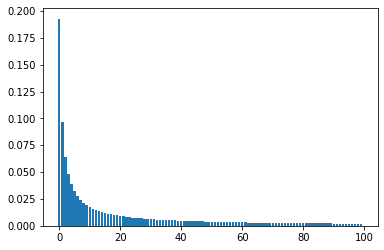

In [58]:
def P(p, alpha):
    p_alphas = p ** alpha
    return p_alphas / p_alphas.sum()
P = P(p, 1)
print(P)
plt.bar(np.arange(100), sorted(P)[::-1])

In [59]:
segments = lambda p_total, k: np.arange(k) * p_total / k

print(segments(100,32))

[ 0.     3.125  6.25   9.375 12.5   15.625 18.75  21.875 25.    28.125
 31.25  34.375 37.5   40.625 43.75  46.875 50.    53.125 56.25  59.375
 62.5   65.625 68.75  71.875 75.    78.125 81.25  84.375 87.5   90.625
 93.75  96.875]


In [21]:
from collections import deque
buf = deque(maxlen=10)
for i in range(10):
    buf.append(i)
buf

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
buf.append(11)
buf

deque([2, 3, 4, 5, 6, 7, 8, 9, 11, 11])

In [25]:
import random
random.sample(buf, 4)

[6, 2, 11, 8]